1번 문제
========
1. num_1 폴더의 uriage 파일을 pandas를 이용하여 데이터프레임으로 불러온다. 
2. purchase_date 컬럼의 데이터 타입을 datetime을 변경한다. 
3. item_name 컬럼의 값을 대문자로 변경한다. 
4. item_name 컬럼의 공백을 지워준다. 
5. item_name 컬럼을 기준으로 오름차순 정렬한다. 
6. 데이터의 결측치가 존재하는지 확인한다. 
7. item_price 컬럼의 결측치의 값을 해당하는 item_name의 맥스값으로 치환하여 준다. 

In [2]:
import pandas as pd
import numpy as np

In [3]:
uriage__df = pd.read_csv('./num_1/uriage.csv')
# uriage__df.dtypes
uriage__df['purchase_date']= pd.to_datetime(uriage__df['purchase_date'])
# uriage__df.dtypes
uriage__df['item_name'] = uriage__df['item_name'].str.upper()
# uriage__df['item_name']
uriage__df['item_name'] = uriage__df['item_name'].str.replace(" ","")
# uriage__df['item_name']   
uriage__df.sort_values('item_name', ascending=True, inplace=True)
# uriage_df
# uriage__df.isnull().sum()
# uriage__df['item_price'].fillna(uriage__df['item_price'].max(), inplace=True)
# uriage__df.isnull().sum()
uriage__df



,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02:00,상품A,100.0,김가온
1748,2019-05-19 20:22:00,상품A,100.0,김시훈
223,2019-06-25 08:13:00,상품A,100.0,김유진
1742,2019-06-13 16:03:00,상품A,100.0,김건희
1738,2019-02-10 00:28:00,상품A,100.0,김하랑
...,...,...,...,...
2880,2019-04-22 00:36:00,상품Y,NaN,김동욱
2881,2019-04-30 14:21:00,상품Y,NaN,김하준
1525,2019-01-24 10:27:00,상품Y,2500.0,김범준
1361,2019-05-28 13:45:00,상품Y,2500.0,김수현


In [4]:
max_price = pd.DataFrame(uriage__df.groupby(['item_name']).max()['item_price']) # 상품별로 최대값 찾아서 저장
null_df = pd.DataFrame(uriage__df["item_name"][uriage__df[uriage__df['item_price'].isna() == True].index]) # 결측치 존재하는 상품들만 저장
uriage__df['item_price'][null_df.index] = max_price['item_price'][null_df['item_name']] # 결측치 대체

uriage__df # 결과값확인
# uriage__df.isna().sum()
# uriage__df.fillna(max_price['item_price'][uriage__df['item_name'][uriage__df['item_price'].isna().indexㄴ]])

# uriage__df['item_price'].fillna(uriage__df['item_price'].max(), inplace=True)

C:\Users\kht91\AppData\Local\Temp\ipykernel_9308\3157827946.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uriage__df['item_price'][null_df.index] = max_price['item_price'][null_df['item_name']] # 결측치 대체


,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02:00,상품A,100.0,김가온
1748,2019-05-19 20:22:00,상품A,100.0,김시훈
223,2019-06-25 08:13:00,상품A,100.0,김유진
1742,2019-06-13 16:03:00,상품A,100.0,김건희
1738,2019-02-10 00:28:00,상품A,100.0,김하랑
...,...,...,...,...
2880,2019-04-22 00:36:00,상품Y,2500.0,김동욱
2881,2019-04-30 14:21:00,상품Y,2500.0,김하준
1525,2019-01-24 10:27:00,상품Y,2500.0,김범준
1361,2019-05-28 13:45:00,상품Y,2500.0,김수현


2번 문제 
===========

1. transaction 폴더 내에 있는 csv 파일을 모두 데이터프렘으로 불러온다. 
2. transaction_1과 transaction_2를 유니언 결합을 한다. 
3. transaction_detail_1과 transaction_detail_2를 유니언 결합을 한다. 
4. 2,3 번의 데이터프레임의 값을 조인 결합을 한다. 
5. 4번 작업한 데이터프레임을 customer_master, item_master 와 조인 결합한다. 
6. quantity와 item_price의 곱한 값으로 price라는 컬럼을 생성한다. 
7. payment_date컬럼의 데이터형태를 datetime으로 변경한다. 
8. payment_date값의 년 월값만 추출하여 payment_month 컬럼을 생성한다. 
9. groupby를 이용하여 월별, 상품별 price와 quantity의 합계를 출력한다. 


3번 문제
==========

1. num_3 폴더내의 drink 파일을 데이터프레임으로 불러온다. 
2. 대륙 컬럼인 continent 결측 데이터를 OT로 지정한다. 
3. 대륙별 spirit_servings의 평균, 최소, 최대, 합계를 계산한다. 
4. 전체 평균보다 많은 알코올 섭취하는 대륙을 구한다. 
5. 3번 과정의 데이터를 바그래프를 이용하여 시각화 한다. 

In [3]:
drinks_df = pd.read_csv('./num_3/drinks.csv')
drinks_df['continent'].fillna('OT', inplace=True)


In [4]:
drinks_df_c = pd.DataFrame(drinks_df.groupby(['continent']).mean()['spirit_servings'])
min = pd.DataFrame(drinks_df.groupby(['continent']).min()['spirit_servings'])
max = pd.DataFrame(drinks_df.groupby(['continent']).max()['spirit_servings'])
sum_1 = pd.DataFrame(drinks_df.groupby(['continent']).sum()['spirit_servings'])

drinks_df_c['Min'] = min
drinks_df_c['Max'] = max
drinks_df_c['Sum'] = sum_1
drinks_df_c.rename(columns={'spirit_servings' : 'Mean'}, inplace=True)

drinks_df_c

,Mean,Min,Max,Sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812
SA,114.750000,25,302,1377


In [5]:
drinks_df_cc = pd.DataFrame(drinks_df.groupby(['continent']).mean()['total_litres_of_pure_alcohol'])
min = pd.DataFrame(drinks_df.groupby(['continent']).min()['total_litres_of_pure_alcohol'])
max = pd.DataFrame(drinks_df.groupby(['continent']).max()['total_litres_of_pure_alcohol'])
sum_1 = pd.DataFrame(drinks_df.groupby(['continent']).sum()['total_litres_of_pure_alcohol'])

drinks_df_cc['Min'] = min
drinks_df_cc['Max'] = max
drinks_df_cc['Sum'] = sum_1
drinks_df_cc.rename(columns={'total_litres_of_pure_alcohol' : 'Mean'}, inplace=True)

drinks_df_cc

,Mean,Min,Max,Sum
continent,,,,
AF,3.007547,0.0,9.1,159.4
AS,2.170455,0.0,11.5,95.5
EU,8.617778,0.0,14.4,387.8
OC,3.381250,0.0,10.4,54.1
OT,5.995652,2.2,11.9,137.9
SA,6.308333,3.8,8.3,75.7


In [6]:
for i in range(len(drinks_df_cc.index)):
    if drinks_df_cc['Mean'].mean() < drinks_df_cc['Mean'][i]:
        print(drinks_df_cc['Mean'].index[i])

EU
OT
SA


In [7]:
import matplotlib.pyplot as plt

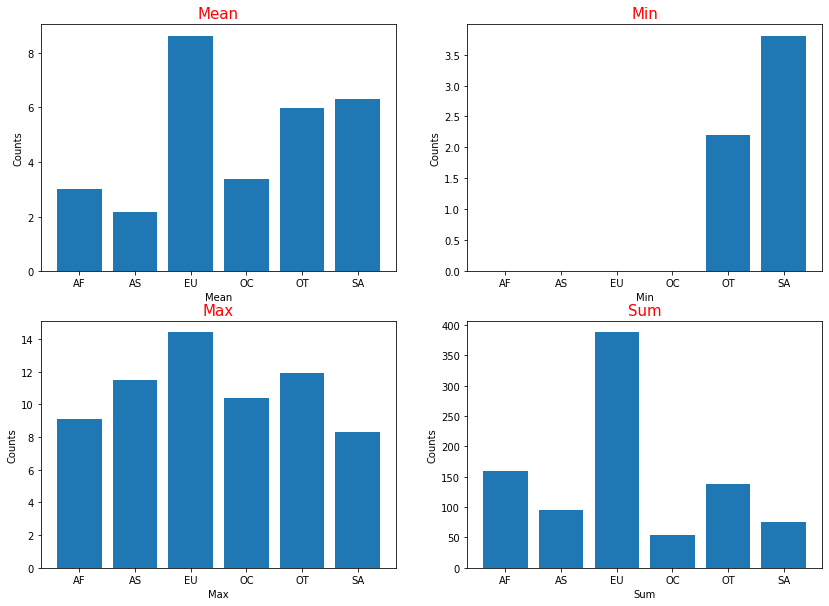

In [8]:
plt.figure(figsize=(14,10), facecolor='w')

for i, col in enumerate(drinks_df_cc.keys()):
    plt.subplot(2,2,i+1)
    plt.bar(drinks_df_cc.index ,drinks_df_cc[col])
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.title(col, color = 'r', fontsize=15)

In [9]:
drinks_df.groupby(['continent'])['spirit_servings'].agg(['mean', 'min', 'max', 'sum'])

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812
SA,114.750000,25,302,1377


In [10]:
drinks_df_new = drinks_df.groupby(['continent'])['total_litres_of_pure_alcohol'].agg(['mean', 'min', 'max', 'sum'])

<AxesSubplot:xlabel='continent'>

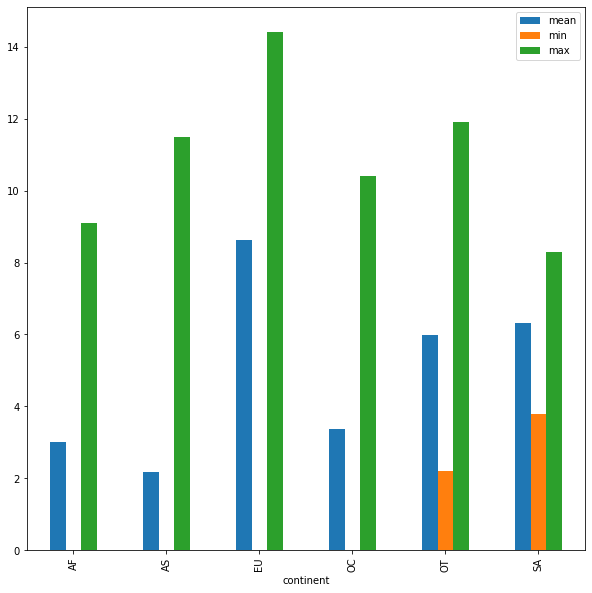

In [24]:
# plt.figure(figsize=(20,20), facecolor='w')
drinks_df_new[['mean', 'min', 'max']].plot(kind='bar', figsize = (10,10))